In [3]:
import numpy as np
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial
import matplotlib.pyplot as plt

%matplotlib inline

Text(5.6, 2.660894955803764, '$(x_5, y_5)$')

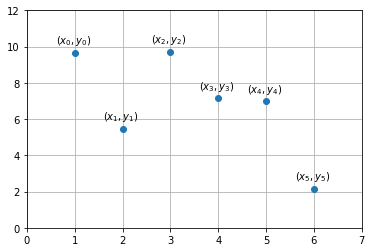

In [13]:
np.random.seed(4)

x = np.arange(1, 7)
y = 10 * np.random.rand(6)

plt.plot(x, y, 'o')
plt.grid(True)
plt.xlim(0, 7)
plt.ylim(0, 12)

plt.annotate('$(x_0, y_0)$', (x[0] + -0.4, y[0] + 0.5) )
plt.annotate('$(x_1, y_1)$', (x[1] + -0.4, y[1] + 0.5) )
plt.annotate('$(x_2, y_2)$', (x[2] + -0.4, y[2] + 0.5) )
plt.annotate('$(x_3, y_3)$', (x[3] + -0.4, y[3] + 0.5) )
plt.annotate('$(x_4, y_4)$', (x[4] + -0.4, y[4] + 0.5) )
plt.annotate('$(x_5, y_5)$', (x[5] + -0.4, y[5] + 0.5) )

We want to find a 5-th order polynomial the passes though all of our points.,
$$y = \alpha_0 + \alpha_1  x +  \alpha_2 x^2 + \alpha_3 x^3 + \alpha_4 x^4 + \alpha_5 x^5$$

So, we have six unknowns, but also six equations:
\begin{array}{ll}
y_0 = & \alpha_0 + \alpha_1  x_0 +  \alpha_2 x_0^2 + \alpha_3 x_0^3 + \alpha_4 x_0^4 + \alpha_5 x_0^5 \\
y_1 = & \alpha_0 + \alpha_1  x_1 +  \alpha_2 x_1^2 + \alpha_3 x_1^3 + \alpha_4 x_1^4 + \alpha_5 x_1^5 \\
y_2 = & \alpha_0 + \alpha_1  x_2 +  \alpha_2 x_2^2 + \alpha_3 x_2^3 + \alpha_4 x_2^4 + \alpha_5 x_2^5 \\
y_3 = & \alpha_0 + \alpha_1  x_3 +  \alpha_2 x_3^2 + \alpha_3 x_3^3 + \alpha_4 x_3^4 + \alpha_5 x_3^5 \\
y_4 = & \alpha_0 + \alpha_1  x_4 +  \alpha_2 x_4^2 + \alpha_3 x_4^3 + \alpha_4 x_4^4 + \alpha_5 x_4^5 \\
y_5 = & \alpha_0 + \alpha_1  x_5 +  \alpha_2 x_5^2 + \alpha_3 x_5^3 + \alpha_4 x_5^4 + \alpha_5 x_5^5 
\end{array}

Or in matrix form,
$$
\begin{pmatrix}
y_0 \\
y_1 \\
y_2 \\
y_3 \\
y_4 \\
y_5
\end{pmatrix}
=
\begin{pmatrix}
x_0^0 & x_0^1 & x_0^2 & x_0^3 & x_0^4 & x_0^5 \\
x_1^0 & x_1^1 & x_1^2 & x_1^3 & x_1^4 & x_1^5 \\
x_2^0 & x_2^1 & x_2^2 & x_2^3 & x_2^4 & x_2^5 \\
x_3^0 & x_3^1 & x_3^2 & x_3^3 & x_3^4 & x_3^5 \\
x_4^0 & x_4^1 & x_4^2 & x_4^3 & x_4^4 & x_4^5 \\
x_5^0 & x_5^1 & x_5^2 & x_5^3 & x_5^4 & x_5^5
\end{pmatrix}
\begin{pmatrix}
\alpha_0 \\
\alpha_1 \\
\alpha_2 \\
\alpha_3 \\
\alpha_4 \\
\alpha_5
\end{pmatrix}
$$

In [18]:
A = np.stack( (x**0, x**1, x**2, x**3, x**4, x**5), axis = 1)

alpha = np.linalg.solve(A, y)
print(alpha)

[ 102.95426043 -189.20594542  131.81958552  -41.68200677    6.12458021
   -0.34017557]


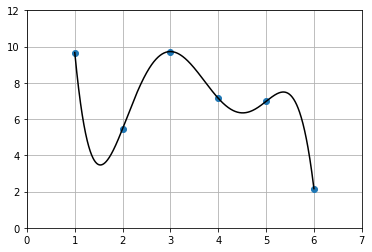

In [25]:
plt.plot(x, y, 'o')
plt.grid(True)
plt.xlim(0, 7)
plt.ylim(0, 12)

X = np.linspace(1, 6, 1000)
y1 = alpha[0] + alpha[1] * X + alpha[2] * X**2 + alpha[3] * X**3 + alpha[4] * X**4 + alpha[5] * X**5

plt.plot(X, y1, 'k')

##  Lagrange Polynomials

<a href="https://en.wikipedia.org/wiki/Lagrange_polynomial">Wikipedia article</A> on Lagrange polynomials

$$L(x) = \sum_{j = 0}^k y_j\ell_j(x)$$
$$\ell_j(x) = \prod_{\substack{0 \leq m \leq k\\ m \neq j}} 
\frac{x - x_m}{x_j - x_m}$$

[  -0.34017557    6.12458021  -41.68200677  131.81958552 -189.20594542
  102.95426043]


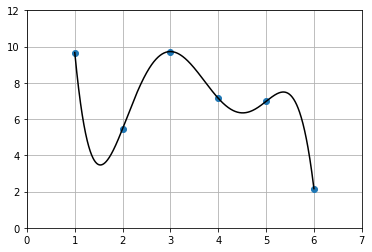

In [35]:
plt.plot(x, y, 'o')
plt.grid(True)
plt.xlim(0, 7)
plt.ylim(0, 12)

L = lagrange(x, y)
L = Polynomial(L).coef
print(L)

plt.plot(X, np.polyval(L, X), 'k')

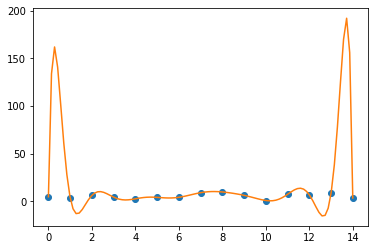

In [45]:
x = np.arange(15)
y = 10 * np.random.rand(x.size)

plt.plot(x, y, 'o')

L = lagrange(x, y)
L = Polynomial(L).coef

X = np.linspace(0, 14, 100)
plt.plot(X, np.polyval(L, X))